# Supermarket sales Analysis

## By Jehoiada Kofi Jackson



In [1]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from scipy import stats
np.random.seed(41)
from itertools import combinations
from collections import Counter
from numpy import median
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.ticker as tick
plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Introduction  

>In this Data Project the author will be looking at sales data from a supermarket. The sales data was obatined from Kaggle.The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. The dataset will be used to analysed

## Preliminary Wrangling  

The data used for this project was obtained from Kaggle (https://www.kaggle.com/aungpyaeap/supermarket-sales)

In [2]:
#load dataset
data=pd.read_csv('supermarket_sales - Sheet1.csv')


### What is the structure of the dataset?
> There is 1000 entries with total Data columns of 20, and different variable types like (int - float - object - bool) but the most type are object.
### What are the main feature(s) of interest in the your dataset?
>   
- Gender  
- Customer type  
- Product line  
- gross income 

#### Data Cleaning

**The data looks clean and ready for exploration.The quality of the data is measured using validity, accuracy, completeness, consistency, and uniformity.** 

## Univariate, Bivariate, Multivariate Exploration 
The exploration stage of this project will divided into 5
1. Gross Income Analysis
2. Product sales Analysis
3. Gender and customer type purchase Analysis
4. Product Ratings and time Analysis
5. City sales Analysis


# Gross Income  Analysis
>Here is the distribution of gross income. The minimum and maximum Gross income was around 1000 and 4500 respectively. takes about 98% of total income. Twenty-five percent of the gross income were below 1200 whiles Seventy-five percent  were between 1200 and 2300.The fross income was positively skewed(skewed right). 

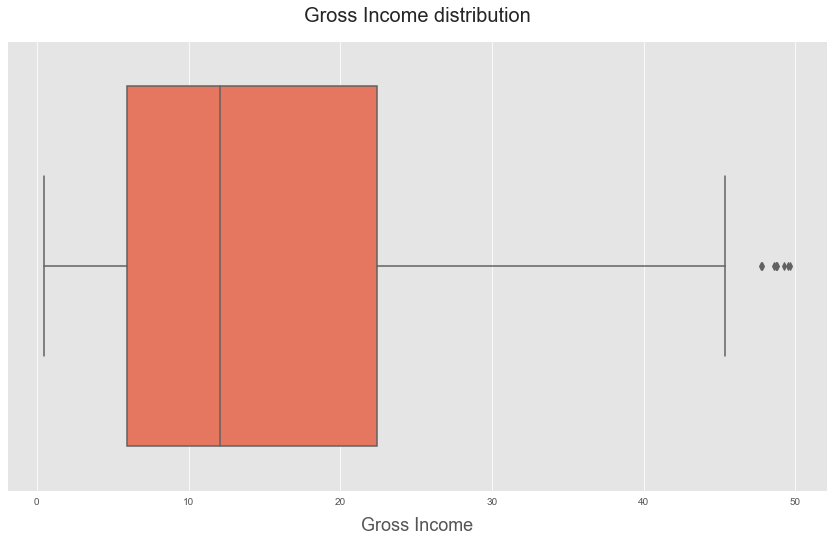

In [3]:
plt.figure(figsize=[14.70, 8.27])
sns.boxplot(x='gross income', data=data, palette='Reds')
plt.title("Gross Income distribution", fontsize=20, y=1.03)
plt.xlabel("Gross Income", fontsize=18, labelpad=10);


#### Monthly sales
>The monthly distribution of sales were very close. January had the highest sales of 352 followed by March with 354 and Feburary with the least sales of 303. Overal there was a total sales of 1000. Based on this output we compute the  gross income for each month.

First estimate the total number of sales for each month  followed by a bivariate exploration of gross income and months

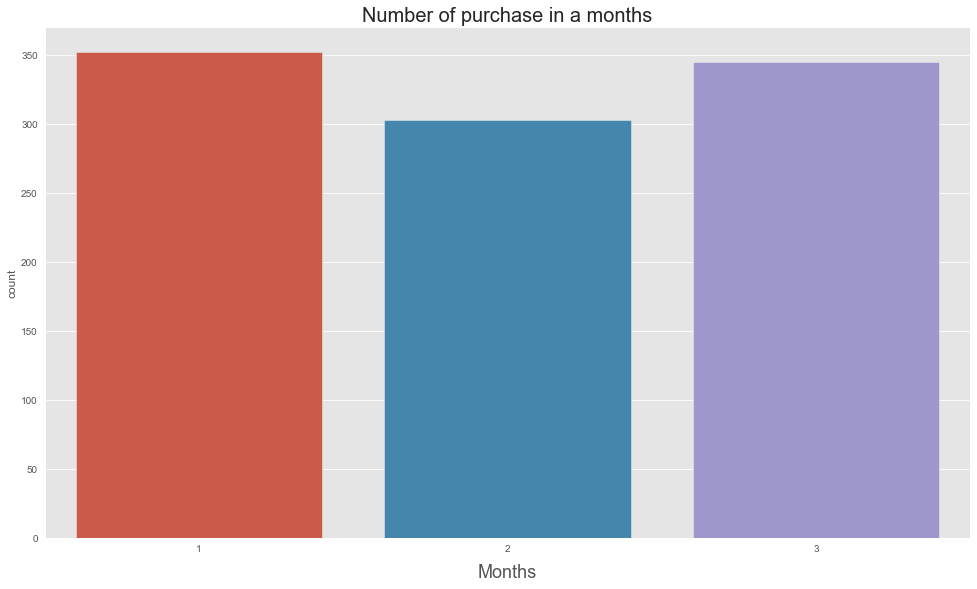

In [4]:
#We first obatined the month by creating another column called month with input from the Date column
data['Month']=data['Date'].str[0]
sns.catplot(x='Month', data=data, kind='count');
plt.gcf().set_size_inches(14.7, 8.27)
plt.title("Number of purchase in a months", fontsize=20, y=1.03);
plt.xlabel("Months", fontsize=18, labelpad=10);

##### Monthly gross income
From the graph Feburary had the least gross income, followed by March. January had the highest gross income. 

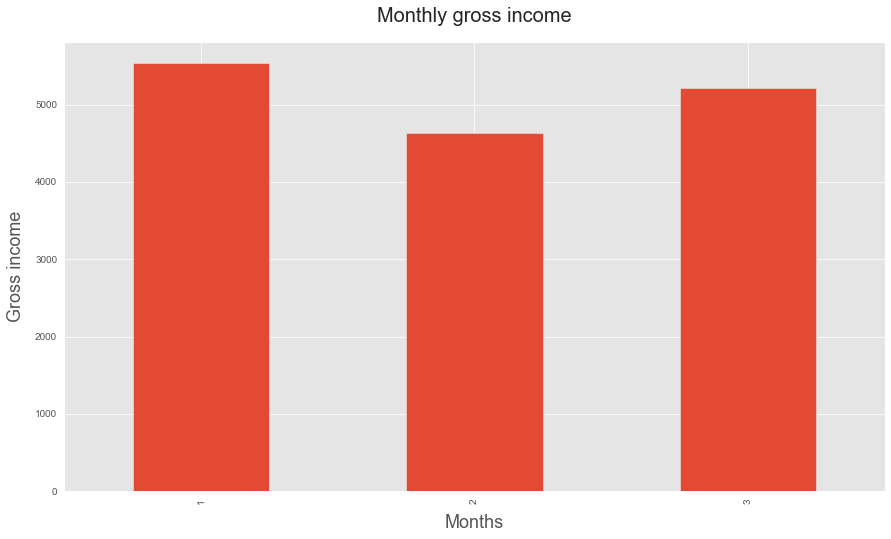

In [5]:

data.groupby('Month')['gross income'].sum(). plot(kind='bar')
plt.gcf().set_size_inches(14.7, 8.27)
plt.title("Monthly gross income", fontsize=20, y=1.03);
plt.xlabel("Months", fontsize=18, labelpad=10);
plt.ylabel('Gross income',fontsize=18, labelpad=10);

# Product sales
>In total there were 6 products sold in the supermarket. Fashion and accessories had the highest sale of 178,Food and beverages was second with 174, Electronic and accessories was third with 170. Sports and travel , Home and lifestyle and Health and beauty generated  166,160 and 152 respectively. 

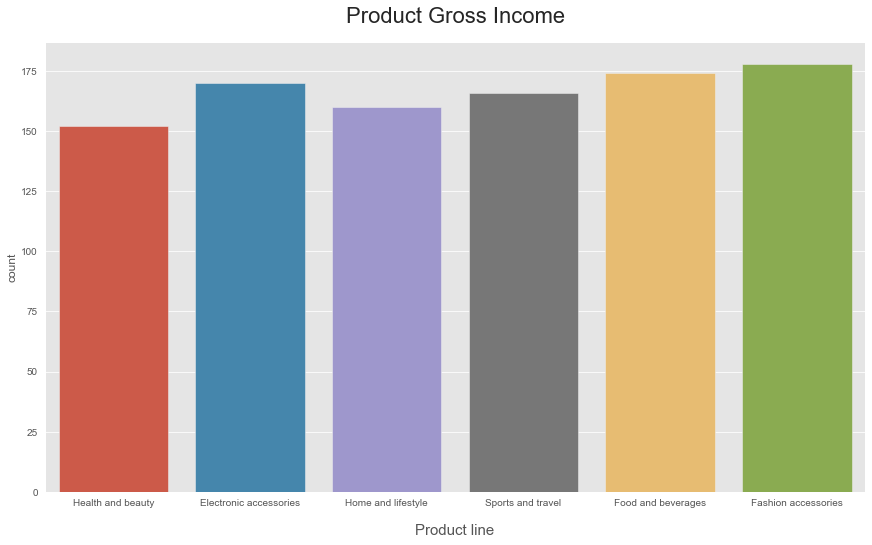

In [6]:
sns.countplot('Product line', data= data)
plt.gcf().set_size_inches(14.7, 8.27)
plt.title('Product Gross Income',fontsize=22, y=1.03);
plt.xlabel('Product line', labelpad=16,fontsize=15);


### product gross income
>A bivariate exploration is performed to know how much each product line generated in terms gross income. Electronic and  accessories had the highest gross income of 2587.5015. Sports and travel had the least gross income 2624.8965 

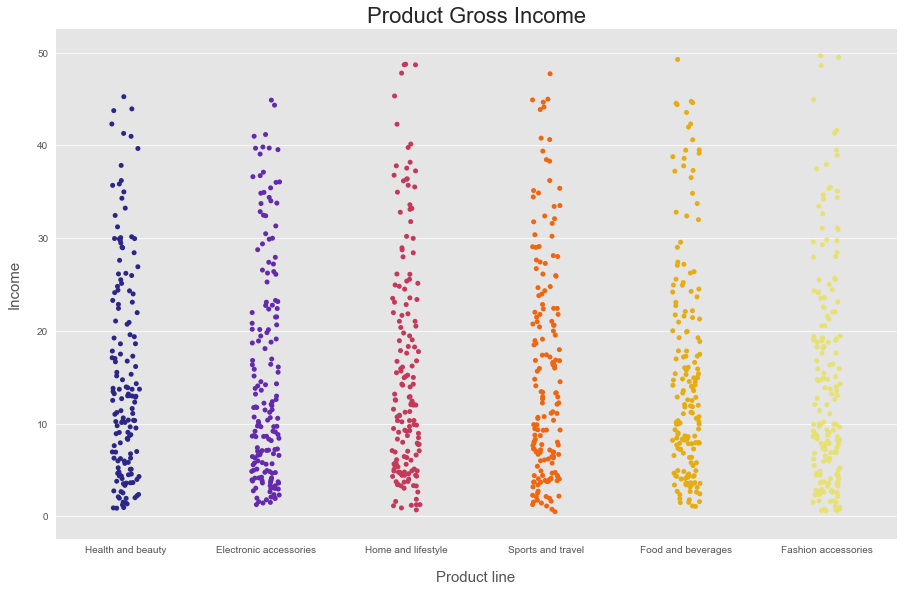

In [7]:
sns.catplot(x="Product line", y='gross income', data=data,palette='CMRmap')
plt.gcf().set_size_inches(14.7, 8.27)
plt.title('Product Gross Income',fontsize=22, y=1.03);
plt.ylabel('Income', labelpad=16,fontsize=15)
plt.xlabel('Product line', labelpad=16,fontsize=15);


#### Monthly product gross income
>Based on this information the author will compute monthly product sales anlysis. The aim is to find how much each product sold in Month 1,2,3


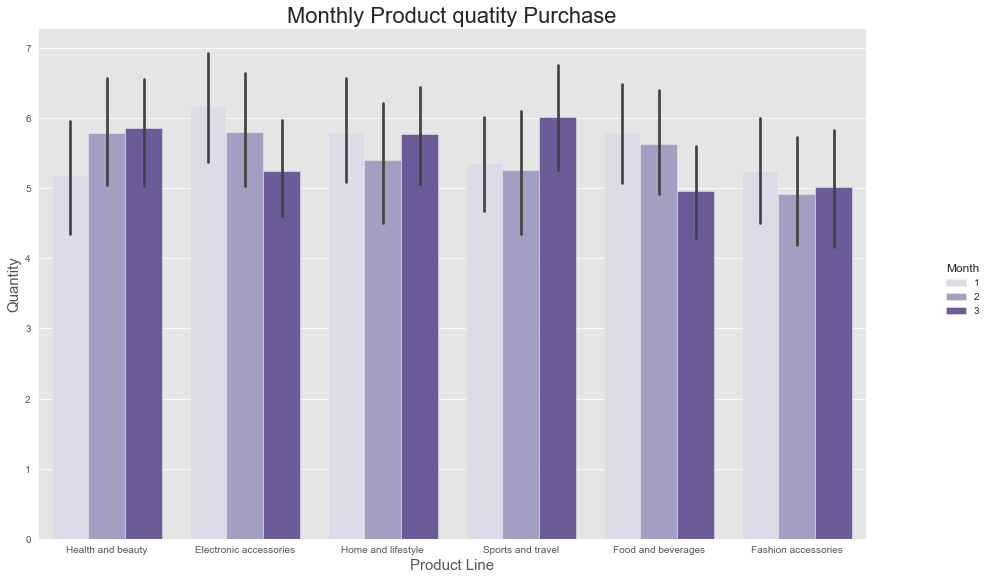

In [8]:
sns.catplot(y='Quantity', x='Product line',hue='Month', data=data, kind="bar", palette='Purples');
plt.gcf().set_size_inches(
    14.7, 8.27)
plt.title('Monthly Product quatity Purchase',fontsize=22, y=1.03);
plt.xlabel('Product Line',fontsize=15);
plt.ylabel('Quantity',fontsize=15);

#### From this graph the author makes the follwoing obersvations:
1. Month 3 had the highest sales in Health and beauty product followed by Month 2.
2. Month 1 had the highest sales in Electronic and beauty products followed by Month 2
3. Month 1 and 3 are  achieved almost the same amount of sales in the Home and lifstyle purcahse.
4. Month 3 had the highest sales in sports and and travel followed by month 1
5. Month 1 had the highest sales in food and bevereages, intuitively the author will assume that it's due to the new year
6. Month 1 had the highest sales in Fashion, intuitively the author will assume that it's due to the new year

#  Gender  and customer type purchase 
> In this supermarket female customers were the highest with a number of 501. Male customers were 499. Based on this data we perform a bivariate exploration to estimate the preference purchase for each gender

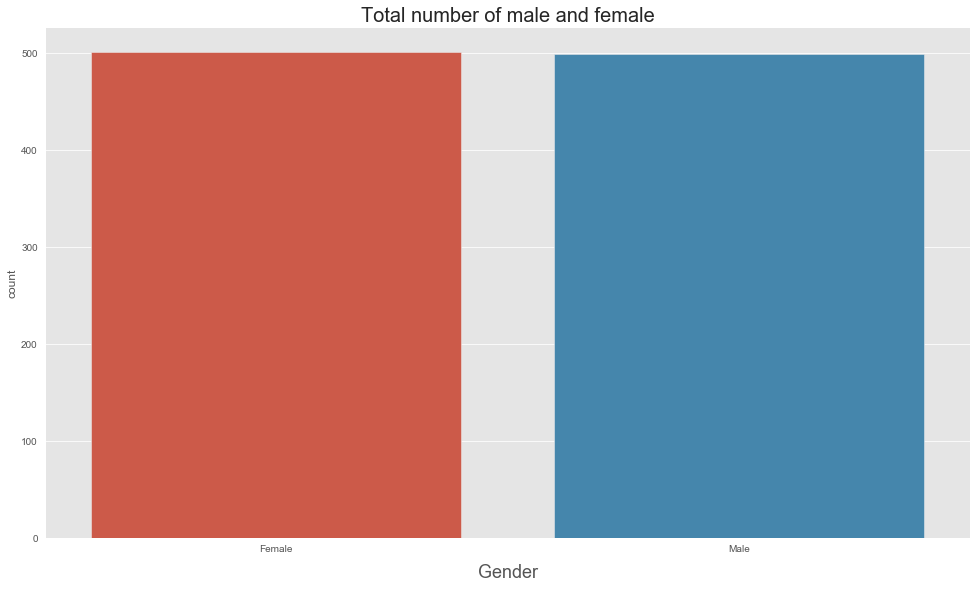

In [9]:
sns.catplot(x='Gender', data=data, kind='count');
plt.gcf().set_size_inches(14.7, 8.27)
plt.title("Total number of male and female", fontsize=20, y=1.03)
plt.xlabel("Gender", fontsize=18, labelpad=10);

### Gender Product purchase
>On the avarage female cutomers made higher purchases on Home and lifestyle, Food and beverages and Fashion accessories. Male customers made higher purchases on Sports and travel and Health and beauty. The rest of the product line was even between the two.


In [10]:
data.groupby(['Total', 'Product line'])['Gender'].sum().head()

Total    Product line       
10.6785  Sports and travel        Male
12.6945  Fashion accessories    Female
13.1670  Fashion accessories    Female
13.4190  Fashion accessories      Male
14.6790  Home and lifestyle       Male
Name: Gender, dtype: object

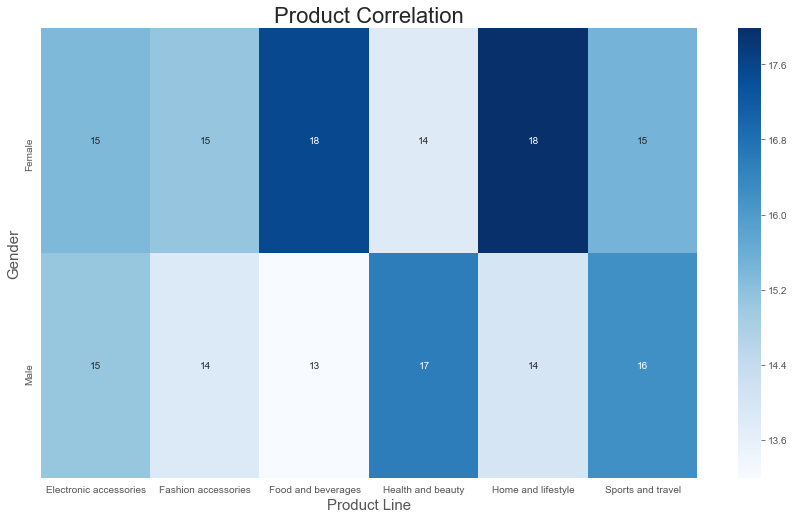

In [11]:
#create pivot table to use for heatmap.
a=data.pivot_table(index='Gender',columns='Product line',values='gross income')
b=sns.heatmap(a,cmap="Blues", robust=True, annot=True)
plt.gcf().set_size_inches(14.7, 8.27)
plt.xlabel('Product Line',fontsize=15)
plt.ylabel('Gender',fontsize=15)
plt.title('Product Correlation',fontsize=22, y=1.03); 
b.set_xticklabels(b.get_xticklabels(), rotation=360);

#### Customer type (memeber/normal) purchase pattern
>Customers who had membership card purchased food and beverages whiles normal customers made high purchases on fashion and accessories.

Text(0, 0.5, 'Customer Type And Product Line')

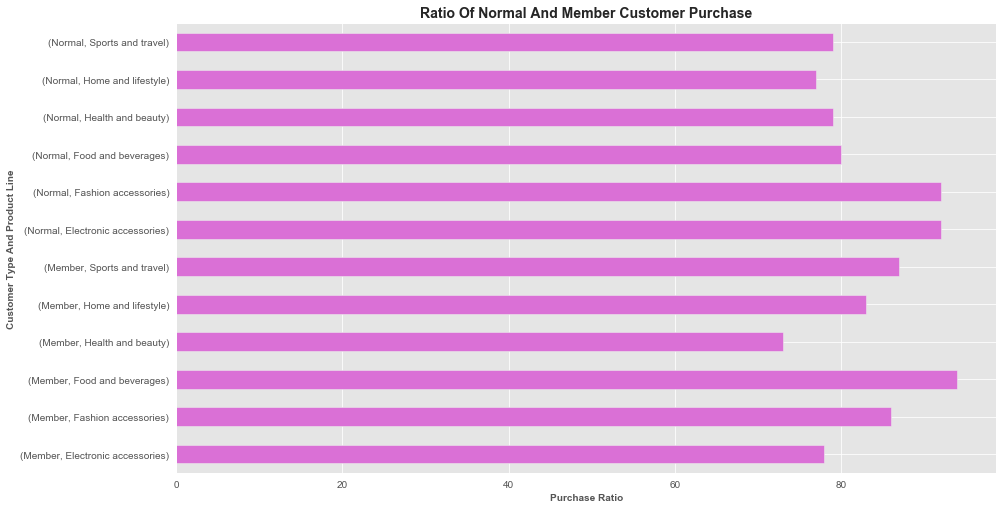

In [12]:

branch=data.groupby(['Customer type','Product line' ]).size().plot(figsize=(14.7,8.27),kind='barh',
                                                                 color='Orchid' )

plt.title('Ratio of normal and member customer purchase'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Purchase ratio'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Customer type and Product line'.title(),
               fontsize = 10, weight = "bold")

# Product Ratings
In this section we compute the average ratings for each of the 6 product lines.

Text(15.050000000000004, 0.5, 'Ratings')

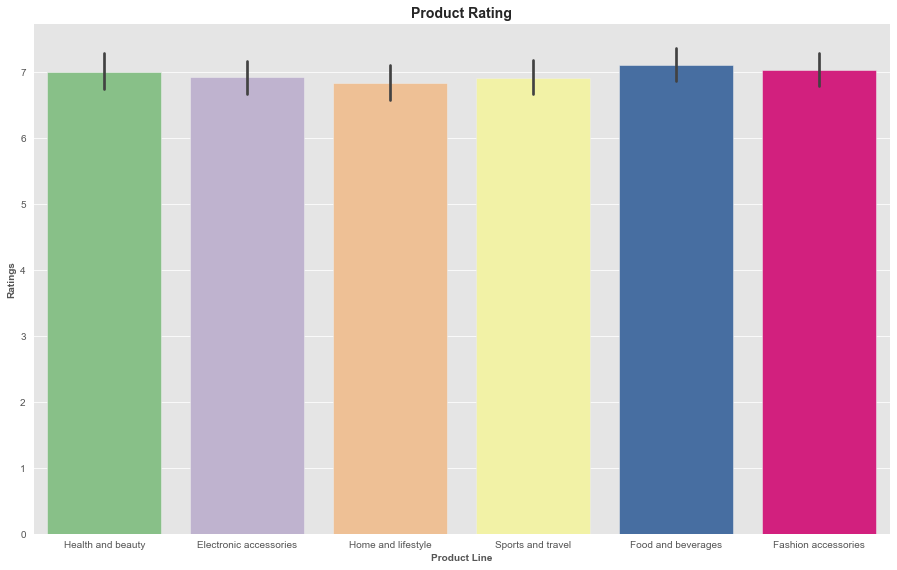

In [13]:
a=data['Rating'].value_counts()
sns.catplot(y='Rating', x='Product line',data=data, kind="bar", palette='Accent');
plt.gcf().set_size_inches(14.7, 8.27);
plt.title('Product rating'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Product Line'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Ratings'.title(),
               fontsize = 10, weight = "bold")

**overall the 6 products had an average of 6.8 in ratings with Food and beverages having 7 which is the highest rating.**
>>**From this graph the author will further visualizes the ratings each gender (Male or Female) gave** 

Text(0, 0.5, 'Ratings')

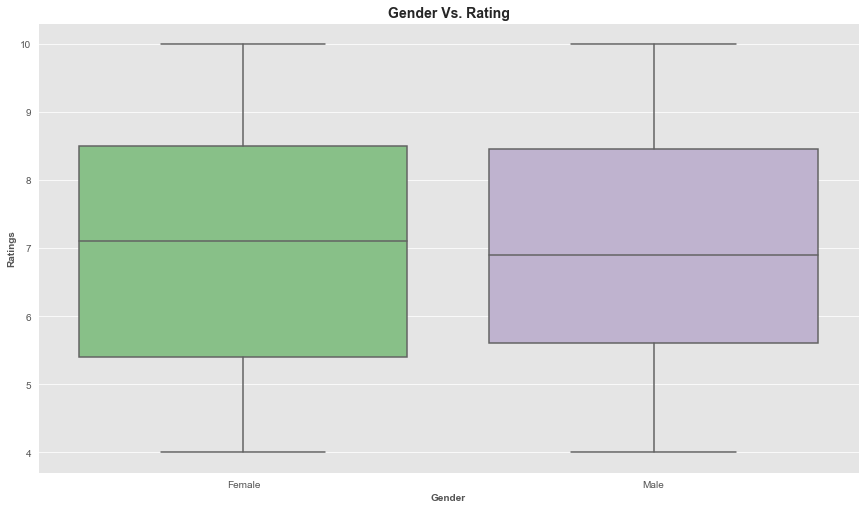

In [14]:
sns.boxplot(y='Rating', x='Gender',data=data, palette='Accent');
plt.gcf().set_size_inches(14.7, 8.27)


plt.title('Gender Vs. Rating'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Gender'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Ratings'.title(),
               fontsize = 10, weight = "bold")

**Using the graph, we can compare how the gender groups in this data rated an item purchased. The minimum ratings for the two genders were 4.0 and a maximum of 10.0. In the First quartile (Q1/25th Percentile) alot female cutomers gave their ratings whiles the third quartile (Q3/75th Percentile) were mostly male customers. Overall, male customers gave a higher ratings comapred to female customers.** 
>**Now, let's look at each gender's ratings to the specific product purchased.** 

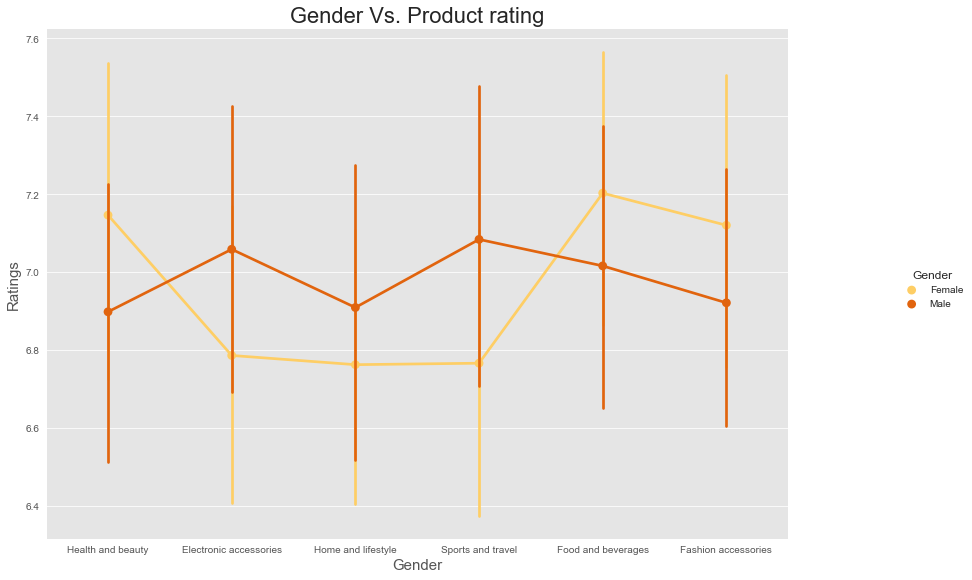

In [15]:

sns.factorplot(y='Rating', x='Product line',hue='Gender',data=data,palette='YlOrBr')
plt.gcf().set_size_inches(14.7, 8.27)
plt.title('Gender Vs. Product rating',fontsize=22, y=1.03); 
plt.ylabel('Ratings',fontsize=15);
plt.xlabel('Gender',fontsize=15);

**Female customers gave a higher ratings for Health and beauty, Food and beverages and fashion and accessories products. This doesn't come as suprise to the author because most women enjoy buying these products. On the Other hand, male clients gave high ratings on Electonic, Home and lifestle, sports and travel products.**
  

### Advert placement time
In this section we calculate which time yielded more purchases based on advert dispplay

>**If adverts are displayed around 19:00 there's a high chance of cutomers purchasing an item. This is due to the fact that most workers will be home around that time. Another perfect time would be lunch peroid because most workers spend some time on their phones whiles they are on break. From the graph customer purchase will be low if adverts are shown around 16:00 to 17:30. Most people aroudn this time are either on their way home or picking up their children**


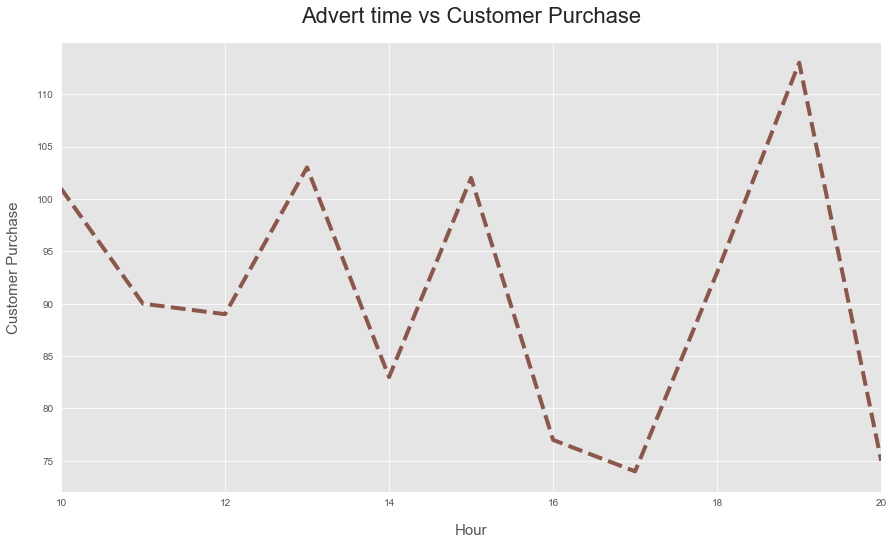

In [16]:

#change datatype of time
data['Time']=pd.to_datetime(data['Time'])
#Group by  hour 
data['Hour']=data['Time'].dt.hour
data['Minutes']=data['Time'].dt.minute
data.head()




#group data by hours and plot it by Time
hour_ad=data.groupby('Hour').count()
hour_ad['Time'].plot(style='--', legend=False,figsize=(14.7, 8.27),color='tab:brown', linewidth=4);
plt.title('Advert time vs Customer Purchase',fontsize=22, y=1.03);
plt.ylabel('Customer Purchase', labelpad=16,fontsize=15)
plt.xlabel('Hour', labelpad=16,fontsize=15)
axis = plt.gca()

# City sales 

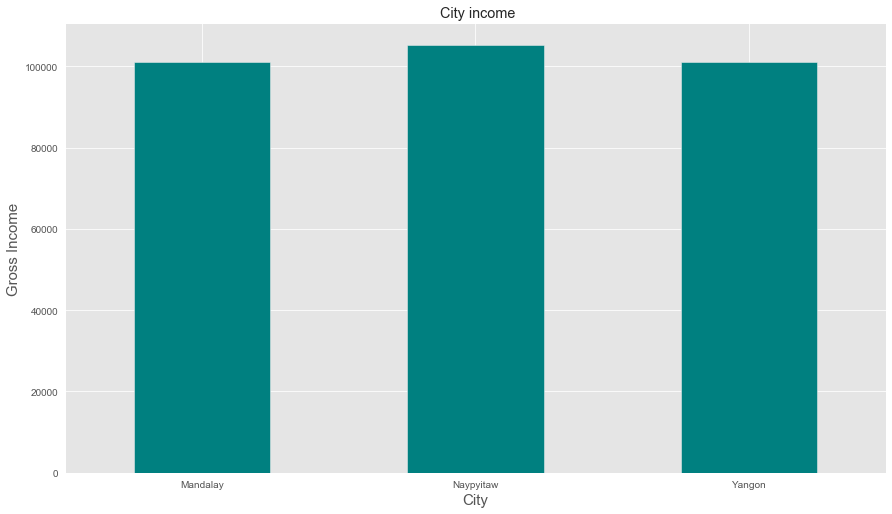

In [17]:
#groupby cities
c=data.groupby(['City']).sum()
c['cogs'].plot.bar(color='teal',figsize=(14.7, 8.27),rot=0);#product with highest gross income 
plt.title(' City income');
plt.xlabel('City',fontsize=15);
plt.ylabel('Gross Income',fontsize=15);


**The cities were close in the total number of sales but Naypyitaw had a little bit higher than the other two**

>> Based on the income of each city we compute the income generated by each product for the three cities

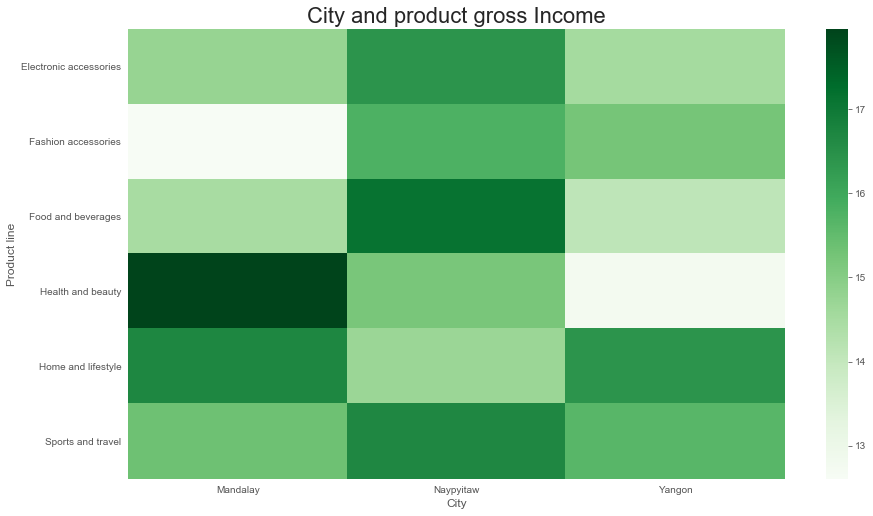

In [18]:
#create pivot table to use for heatmap.
a=data.pivot_table(index='Product line',columns='City',values='gross income')
sns.heatmap(a,cmap="Greens")
plt.gcf().set_size_inches(14.7, 8.27)
plt.title('City and product gross Income',fontsize=22, y=1.03); 
plt.yticks(rotation=0);

**From the above image we make the following duductions**:
1. Naypyitaw had the highest gross income for Electronic products, food and beverages,fashion and accessories and sports and travel product.
2. Mandalay had the highest income for health and beauty products.

**From this graphical representation we go deeper by looking at each city and its customer type and their income generated**

In [19]:
data['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [20]:
data.groupby(['City'])['Branch'].value_counts()
data.groupby(['City'])['Customer type'].value_counts()

City       Customer type
Mandalay   Normal           167
           Member           165
Naypyitaw  Member           169
           Normal           159
Yangon     Normal           173
           Member           167
Name: Customer type, dtype: int64

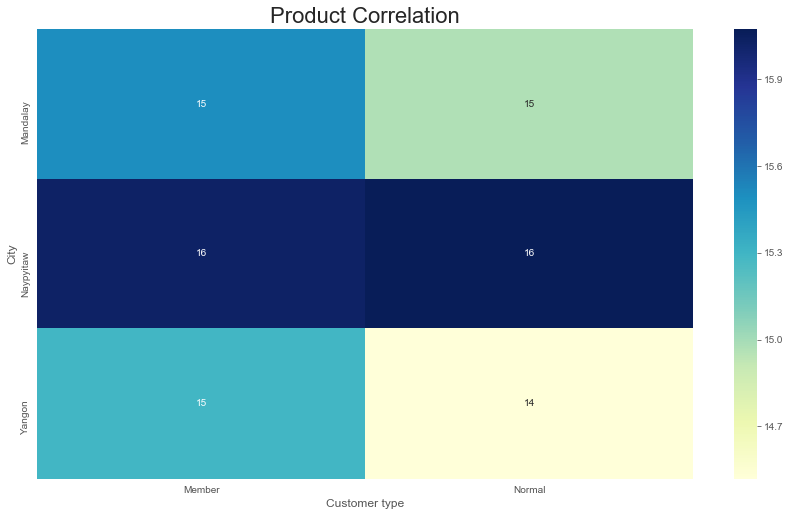

In [21]:
#create pivot table to use for heatmap.
a=data.pivot_table(index='City',columns='Customer type',values='gross income')
sns.heatmap(a,cmap="YlGnBu", robust=True, annot=True)
plt.gcf().set_size_inches(14.7, 8.27)
plt.title('Product Correlation',fontsize=22, y=1.03); 

**From the data there are 3 cities and two types of cutomers. In Yangon city customers who were members generated a gross income of 15000 whiles normal customers generated 14000. In Naypyitaw customers with membership and normal  ones generated 16000 each. In Mandalay both types of cutomers generated 15000 each. Overall, Naypyitaw had the highest for both normal and customers with membership** 

#### Coclusion
**From the analysis conducted most customers prefered buying food and beverages. Almost all the three cities had equal sales. To maximize profit the company should focus on display adverts at 19:00 in order to attract a larger number of customers**

**Thank You** 



## Sources
-   [https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/]
-   [https://matplotlib.org/3.1.0/gallery/color/named_colors.html
-   [Seaborn catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)  documentation
-   [Matplotlib histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)  documentation
-   [IPython Display](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html)  documentation
-   [Seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)  documentation and  [tutorial](https://likegeeks.com/seaborn-heatmap-tutorial/)

In [ ]:
!jupyter nbconvert slide__deck_template.ipynb --to slides --post serve --template output_toggle